In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import nltk
from tqdm import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
from textblob import TextBlob
 
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow.keras.layers as Layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import ast
import itertools
from wordcloud import WordCloud, STOPWORDS
from tensorflow.keras.preprocessing import sequence
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow.keras.backend as K
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM

# READING THE DATA FROM FILE IN DATA FRAMES

In [2]:
#FILE BEING DOWNLOADED FROM KAGGLE
df_raw = pd.read_csv('Bitcoin_tweets.csv',low_memory=False)
print(df_raw.shape)
df_raw.head()

(2259788, 13)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


# DATA CLEANING

In [3]:
# REMOVING NAN VALUES
df_raw.dropna(axis=0 ,subset=['date','text'],inplace = True)
df_raw.reset_index(drop= True,inplace=True)
df_raw.shape

(2259650, 13)

In [4]:
# REMOVING DUPLICACY IF THERE IS ANY
df_raw.drop_duplicates(inplace = True)
df_raw.reset_index(drop=True,inplace=True)
df_raw.shape

(2259650, 13)

In [5]:
df_raw.dtypes

user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends         object
user_favourites      object
user_verified        object
date                 object
text                 object
hashtags             object
source               object
is_retweet           object
dtype: object

In [6]:
# CONVERTING DATA TYPE IN CONSISTENT TYPE FOR WHOLE DATASET
df_raw = df_raw.convert_dtypes()
df_raw.dtypes

user_name            string
user_location        string
user_description     string
user_created         string
user_followers        Int64
user_friends         string
user_favourites      string
user_verified        string
date                 string
text                 string
hashtags             string
source               string
is_retweet          boolean
dtype: object

In [7]:
#CLEANING THE DATE FILED WHICH HAS INVALID VALUE
errors = []
for i,v in enumerate(df_raw['date']):
    try:
        pd.to_datetime(v, format='%Y-%m-%d %H:%M:%S')
    except ValueError:
        errors.append(i)
df_clean = df_raw.loc[~df_raw.index.isin(errors)]
df_clean.reset_index(drop=True,inplace=True)
df_clean.shape

(2259638, 13)

In [8]:
# CLEANING IRRELEVANT WORDS, HTTPS AND HASHTAGS FROM TEXT 
df = df_clean.copy()
df['text'] = df['text'].str.replace("(@\[A-Za-z0-9]+)|'#'|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", regex=True)

In [9]:
#STOP WORDS REMOVAL
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = nltk.corpus.stopwords.words(['english'])
texts_cleaned = []
for i in range(len(df['text'])):
    split_text = df['text'][i].lower().split()
    txt_without_sw = [t for t in split_text if t not in stop_words]
    text_vals = ' '.join(txt_without_sw)
    texts_cleaned.append(text_vals)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\simra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\simra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
df['texts_cleaned'] = texts_cleaned
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,texts_cleaned
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after b...,['bitcoin'],Twitter Web App,False,blue ridge bank shares halted nyse bitcoin atm...
1,CryptoND,<NA>,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769,1532,25483,False,2021-02-10 23:58:48,Today that s this Thursday we will do a ...,"['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,today thursday take 2 friend leowandersleb btc...
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128,332,924,False,2021-02-10 23:54:48,Guys evening I have read this article about B...,<NA>,Twitter Web App,False,guys evening read article btc would like share
3,Crypto is the future,<NA>,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625,129,14,False,2021-02-10 23:54:33,BTC A big chance in a billion Price 487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,btc big chance billion price 4872644 0 2021 02...
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,network secured 9 508 nodes today soon biggest...


# READING BITCOIN PRICES DATASET

In [11]:
price_df = pd.read_csv('bitcoin_prices.csv')
price_df.Date = pd.to_datetime(price_df.Date)
price_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# SENTIMENT ANALYSIS SCORING

In [12]:
#SENTIMENT ANALYSER
sentiment = SentimentIntensityAnalyzer()
analysed_val = []
for i,s in enumerate(tqdm(df['text'],position=0, leave=True)):
    vs = sentiment.polarity_scores(str(s))
    analysed_val.append(vs["compound"])
df["sentiment"] = analysed_val
df.head(2)

100%|██████████████████████████████████████████████████████████████████████| 2259638/2259638 [04:24<00:00, 8544.81it/s]


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,texts_cleaned,sentiment
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after b...,['bitcoin'],Twitter Web App,False,blue ridge bank shares halted nyse bitcoin atm...,0.2960
1,CryptoND,<NA>,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769,1532,25483,False,2021-02-10 23:58:48,Today that s this Thursday we will do a ...,"['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,today thursday take 2 friend leowandersleb btc...,0.6808


In [13]:
# SENTIMENTS SCORE CALCULATION
scores = []
for i, s in tqdm(df.iterrows(), total=df.shape[0],position=0, leave=True):
    try:
        scores.append(s["sentiment"] * ((int(s["user_followers"]))) * ((int(s["user_favourites"])+1)/int(s['user_followers']+1)) *((int(s["is_retweet"])+1)))
    except:
        scores.append(np.nan)
df["score"] = scores
df.head()

100%|█████████████████████████████████████████████████████████████████████| 2259638/2259638 [01:31<00:00, 24650.69it/s]


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,texts_cleaned,sentiment,score
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after b...,['bitcoin'],Twitter Web App,False,blue ridge bank shares halted nyse bitcoin atm...,0.2960,1432.176180
1,CryptoND,<NA>,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769,1532,25483,False,2021-02-10 23:58:48,Today that s this Thursday we will do a ...,"['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,today thursday take 2 friend leowandersleb btc...,0.6808,17346.944496
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128,332,924,False,2021-02-10 23:54:48,Guys evening I have read this article about B...,<NA>,Twitter Web App,False,guys evening read article btc would like share,0.5719,524.906667
3,Crypto is the future,<NA>,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625,129,14,False,2021-02-10 23:54:33,BTC A big chance in a billion Price 487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,btc big chance billion price 4872644 0 2021 02...,0.2500,3.744010
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,network secured 9 508 nodes today soon biggest...,-0.2023,-2119.014331


In [14]:
df.drop_duplicates()
df.to_csv('Bitcoins_tweet_sentimented.csv', index=False)

# BITCOIN PRICE ANALYSIS AS COMPARED TO TWEET SENTIMENTS

In [15]:
tweets_copy = df.copy()
tweets_copy['date'] = pd.to_datetime(tweets_copy['date'],utc=True)  #Convert the 'date' column to datetime format and set timezone to UTC
tweets_copy.date = tweets_copy.date.dt.tz_localize(None)
tweets_copy.index = tweets_copy['date']
twts_grouped = tweets_copy.resample('1h').sum()   #Group the tweets by hour and aggregate the values using the sum function
bitcoin_val = price_df.copy()
bitcoin_val['Date'] = pd.to_datetime(bitcoin_val['Date'], unit='s')
bitcoin_val.index = bitcoin_val['Date']
bitcoin_val_grouped = bitcoin_val.resample('D')['Close'].mean()  #Group the bitcoin price data by day and calculate the mean 'Close' value for each day

In [16]:
beggining = max(twts_grouped.index.min().replace(tzinfo=None), bitcoin_val_grouped.index.min())
end = min(twts_grouped.index.max().replace(tzinfo=None), bitcoin_val_grouped.index.max())
# Subset the time series to only keep the overlapping dates
twts_grouped = twts_grouped[beggining:end]
bitcoin_val_grouped = bitcoin_val_grouped[beggining:end]   

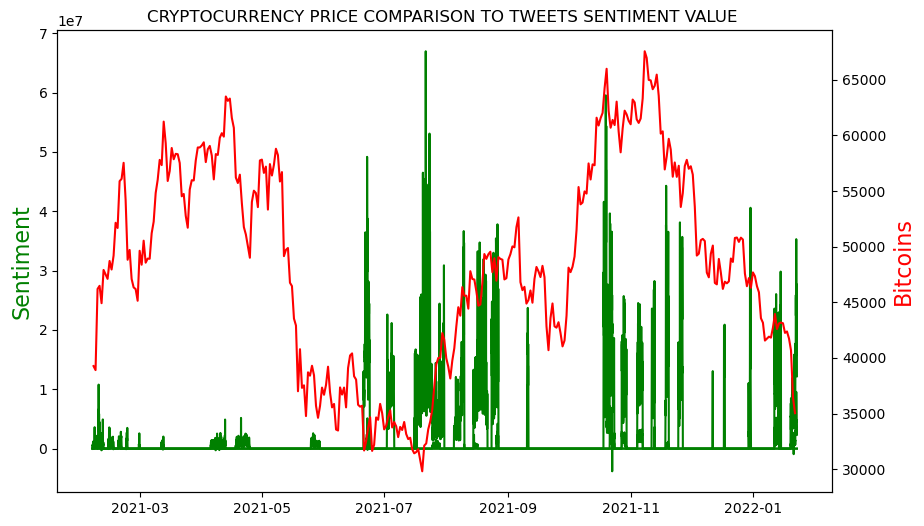

In [17]:
# PLOTTING THE GRAPH OF BITCOIN PRICES AND SENTIMENT SCORE FOR COMPARISON
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_title("CRYPTOCURRENCY PRICE COMPARISON TO TWEETS SENTIMENT VALUE ", fontsize=12)
ax2 = ax1.twinx()
ax1.plot_date(twts_grouped.index, twts_grouped, 'green')
ax2.plot_date(bitcoin_val_grouped.index, bitcoin_val_grouped, 'red')
ax1.set_ylabel("Sentiment", color='green', fontsize=16)
ax2.set_ylabel("Bitcoins", color='red', fontsize=16)
plt.show()


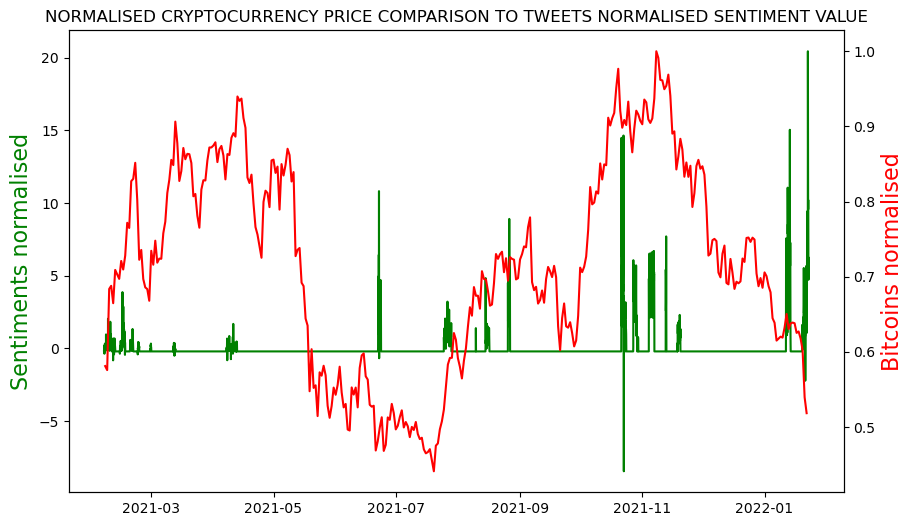

In [18]:
# Normalize time series data
min_max_scaler = preprocessing.StandardScaler()
score_scaled = min_max_scaler.fit_transform(twts_grouped['score'].values.reshape(-1,1))
twts_grouped['normalized_score'] = score_scaled
crypto_used_grouped_scaled = bitcoin_val_grouped / max(bitcoin_val_grouped.max(), abs(bitcoin_val_grouped.min()))
# PLOTTING THE NORMALISE VALUE COMPARISON GRAPH
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_title("NORMALISED CRYPTOCURRENCY PRICE COMPARISON TO TWEETS NORMALISED SENTIMENT VALUE", fontsize=12)
ax2 = ax1.twinx()
ax1.plot_date(twts_grouped.index, twts_grouped['normalized_score'], 'green')
ax2.plot_date(bitcoin_val_grouped.index, crypto_used_grouped_scaled, 'red')

ax1.set_ylabel("Sentiments normalised", color='green', fontsize=16)
ax2.set_ylabel("Bitcoins normalised", color='red', fontsize=16)
plt.show()

In [19]:
tweets_grouped_derivative = pd.Series(np.gradient(twts_grouped['normalized_score'].values), twts_grouped.index, name='slope')
bitcoin_derivative = pd.Series(np.gradient(bitcoin_val_grouped.values), bitcoin_val_grouped.index, name='slope')

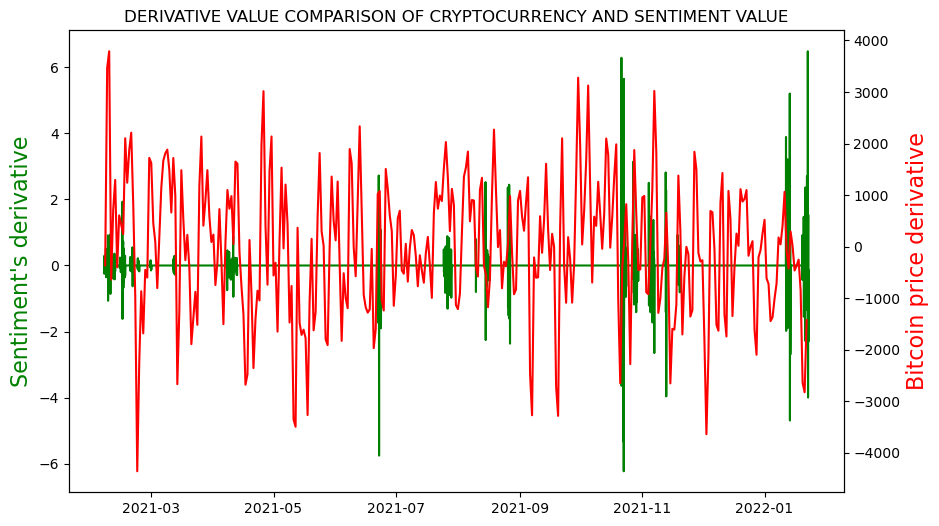

In [20]:
# DERIVATIVE VLAUE COMPARISON
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_title("DERIVATIVE VALUE COMPARISON OF CRYPTOCURRENCY AND SENTIMENT VALUE", fontsize=12)
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped_derivative.index, tweets_grouped_derivative, 'green')
ax2.plot_date(bitcoin_derivative.index, bitcoin_derivative, 'red')

ax1.set_ylabel("Sentiment's derivative", color='green', fontsize=16)
ax2.set_ylabel('Bitcoin price derivative', color='red', fontsize=16)
plt.show()

# SENTIMENT TOKENIZATION 

In [21]:
df_new = pd.DataFrame()
df_new['tweets'] = df['text'].copy()
df_new['cleaned_tweets'] = texts_cleaned
df_new['date'] = df['date']
df_new['date_clean'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
df_new.drop(columns='date',inplace=True)
df_new.head()

,tweets,cleaned_tweets,date_clean
0,Blue Ridge Bank shares halted by NYSE after b...,blue ridge bank shares halted nyse bitcoin atm...,2021-02-10
1,Today that s this Thursday we will do a ...,today thursday take 2 friend leowandersleb btc...,2021-02-10
2,Guys evening I have read this article about B...,guys evening read article btc would like share,2021-02-10
3,BTC A big chance in a billion Price 487264...,btc big chance billion price 4872644 0 2021 02...,2021-02-10
4,This network is secured by 9 508 nodes as of t...,network secured 9 508 nodes today soon biggest...,2021-02-10


In [22]:
# compare price ratio in 7 days. price_7_days_later/ price_now 
tmp = bitcoin_val_grouped.shift(7)/bitcoin_val_grouped
def get_val(x):
    if x < 1:
        return 'negative'
    elif x == 1:
        return 'neutral'
    else:
        return 'positive'

val = tmp.apply(get_val)
time_sentiment = val 
df_new['crypto_sentiment'] = df_new['date_clean'].apply(lambda x: time_sentiment.get(x, np.nan))   

In [23]:
#USING TEXTBLOB VALUE GENERATION
df_new['subjectivity'] = df_new['cleaned_tweets'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df_new['polarity'] = df_new['cleaned_tweets'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_new.head()

,tweets,cleaned_tweets,date_clean,crypto_sentiment,subjectivity,polarity
0,Blue Ridge Bank shares halted by NYSE after b...,blue ridge bank shares halted nyse bitcoin atm...,2021-02-10,positive,0.1,0.00
1,Today that s this Thursday we will do a ...,today thursday take 2 friend leowandersleb btc...,2021-02-10,positive,0.0,0.00
2,Guys evening I have read this article about B...,guys evening read article btc would like share,2021-02-10,positive,0.0,0.00
3,BTC A big chance in a billion Price 487264...,btc big chance billion price 4872644 0 2021 02...,2021-02-10,positive,0.1,0.00
4,This network is secured by 9 508 nodes as of t...,network secured 9 508 nodes today soon biggest...,2021-02-10,positive,0.2,-0.25


In [24]:
#GETTING SENTIMENT SCRING USING TEXTBLOB SUBJECTIVITY & POLARITY
def getscore(value):
    if value < 0:
        return 'negative'
    elif value == 0:
        return 'neutral'
    else:
        return 'positive'
df_new['sentiment'] = df_new['polarity'].apply(getscore)
df_new['target'] = df_new['sentiment'] == df_new['crypto_sentiment']
df.to_csv('Tokenised_tweets')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,texts_cleaned,sentiment,score
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after b...,['bitcoin'],Twitter Web App,False,blue ridge bank shares halted nyse bitcoin atm...,0.2960,1432.176180
1,CryptoND,<NA>,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769,1532,25483,False,2021-02-10 23:58:48,Today that s this Thursday we will do a ...,"['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,today thursday take 2 friend leowandersleb btc...,0.6808,17346.944496
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128,332,924,False,2021-02-10 23:54:48,Guys evening I have read this article about B...,<NA>,Twitter Web App,False,guys evening read article btc would like share,0.5719,524.906667
3,Crypto is the future,<NA>,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625,129,14,False,2021-02-10 23:54:33,BTC A big chance in a billion Price 487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,btc big chance billion price 4872644 0 2021 02...,0.2500,3.744010
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,network secured 9 508 nodes today soon biggest...,-0.2023,-2119.014331


# MODEL TESTING AND TRAINING FOR LSTM 

In [25]:
X1 = df_new[(df_new['date_clean'] >= '2021-09-01') & (df_new['date_clean'] <= '2022-01-31')]['cleaned_tweets']
y1 = pd.get_dummies(df_new[(df_new['date_clean'] >= '2021-09-01') & (df_new['date_clean'] <= '2022-01-31')]['sentiment']).values
num_values = df_new['sentiment'].nunique()

In [26]:
X1.shape

(1050352,)

In [27]:
seed = 42 # fix random seed for reproducibility
np.random.seed(seed)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, 
                                                    test_size=0.2,
                                                    stratify=y1,
                                                    random_state=seed)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(840281,) (210071,) (840281, 3) (210071, 3)


In [28]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train1))
X_train1 = tokenizer.texts_to_sequences(X_train1)
X_test1 = tokenizer.texts_to_sequences(X_test1)

In [29]:
max_words = 30
X_train1 = sequence.pad_sequences(X_train1, maxlen=max_words)
X_test1 = sequence.pad_sequences(X_test1, maxlen=max_words)

In [30]:
batch_size = 128
epochs = 10

max_features = 20000
embed_dim = 100

np.random.seed(seed)
K.clear_session()
# SEQUENTIAL MODELLING
new_model = Sequential()
new_model.add(Embedding(max_features, embed_dim, input_length=X_train1.shape[1]))
new_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
new_model.add(Dense(num_values, activation='softmax'))
new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           2000000   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 2,080,703
Trainable params: 2,080,703
Non-trainable params: 0
_________________________________________________________________


In [31]:
predict = new_model.fit(X_train1, y_train1, validation_data=(X_test1, y_test1), 
                          epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/10
6565/6565 - 718s - loss: 0.0808 - accuracy: 0.9754 - val_loss: 0.0438 - val_accuracy: 0.9887 - 718s/epoch - 109ms/step
Epoch 2/10
6565/6565 - 686s - loss: 0.0383 - accuracy: 0.9895 - val_loss: 0.0375 - val_accuracy: 0.9902 - 686s/epoch - 105ms/step
Epoch 3/10
6565/6565 - 708s - loss: 0.0292 - accuracy: 0.9919 - val_loss: 0.0360 - val_accuracy: 0.9911 - 708s/epoch - 108ms/step
Epoch 4/10
6565/6565 - 732s - loss: 0.0225 - accuracy: 0.9937 - val_loss: 0.0385 - val_accuracy: 0.9908 - 732s/epoch - 111ms/step
Epoch 5/10
6565/6565 - 766s - loss: 0.0177 - accuracy: 0.9950 - val_loss: 0.0396 - val_accuracy: 0.9912 - 766s/epoch - 117ms/step
Epoch 6/10
6565/6565 - 938s - loss: 0.0138 - accuracy: 0.9961 - val_loss: 0.0472 - val_accuracy: 0.9898 - 938s/epoch - 143ms/step
Epoch 7/10
6565/6565 - 1016s - loss: 0.0112 - accuracy: 0.9968 - val_loss: 0.0491 - val_accuracy: 0.9898 - 1016s/epoch - 155ms/step
Epoch 8/10
6565/6565 - 1108s - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.0516 - val_

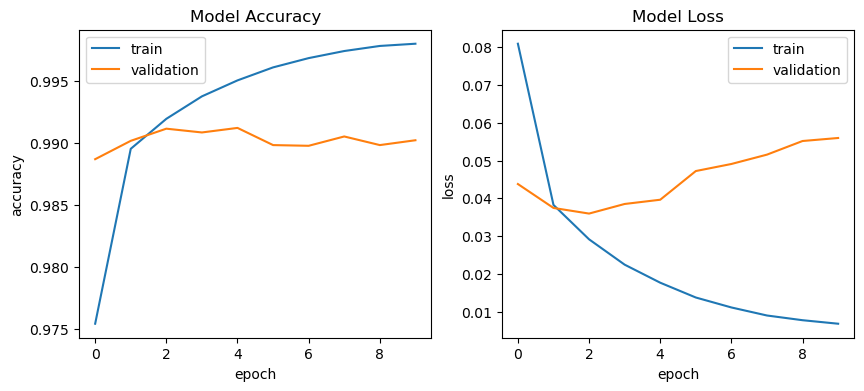

In [32]:
# Plot history for accuracy and loss for comparison
def plot_training_hist(predict):
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # first plot
    ax[0].plot(predict.history['accuracy'])
    ax[0].plot(predict.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # second plot
    ax[1].plot(predict.history['loss'])
    ax[1].plot(predict.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(predict)

In [33]:
# predict class with test set
y_pred_test =  np.argmax(new_model.predict(X_test1), axis=1)
# ACCURACY CHECKING FOR THE MODEL
print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test1,axis=1),y_pred_test)*100))
print(classification_report(np.argmax(y_test1,axis=1), y_pred_test))

6565/6565 [==============================] - 69s 10ms/step
Accuracy:	99.0%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     22527
           1       0.99      0.99      0.99     82591
           2       0.99      0.99      0.99    104953

    accuracy                           0.99    210071
   macro avg       0.99      0.98      0.99    210071
weighted avg       0.99      0.99      0.99    210071



6565/6565 [==============================] - 92s 14ms/step
2    104953
1     82591
0     22527
dtype: int64
2    104939
1     82665
0     22467
dtype: int64


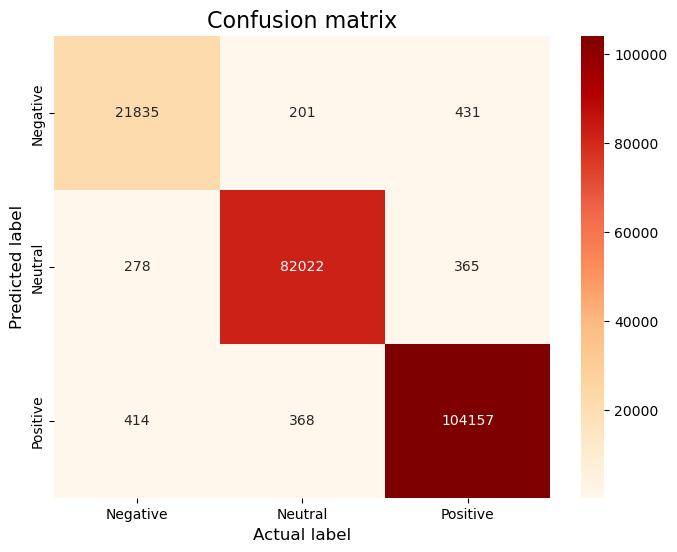

In [34]:
 
def plot_confusion_matrix(model, X_test, y_test): 
    sentiment_classes = ['Negative','Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap='OrRd', annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
  
plot_confusion_matrix(new_model, X_test1, y_test1)

# WORD CLOUD REPRESENTATION

In [35]:
#word cloud for hashtags
values = df['hashtags'].dropna()
hashtag_list = values.apply(ast.literal_eval)

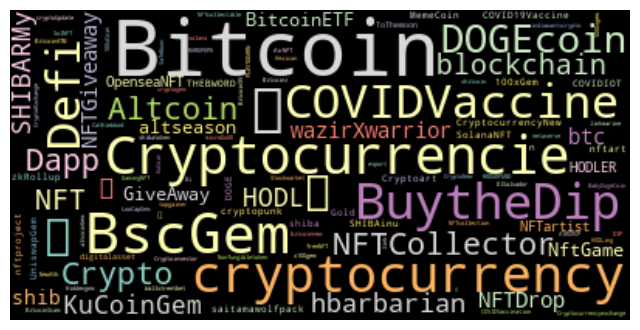

In [36]:

hashtags = list(itertools.chain(*hashtag_list))
# Remove any repeating words using a set
words_eng = list(set(hashtags))
words_list = ' '.join(word for word in words_eng)
c = WordCloud(background_color='black',
                        colormap='Set3',
                          stopwords=set(STOPWORDS),
                          max_words=200,
                          max_font_size=50,
                          random_state=42)
c.generate(words_list)
plt.figure(figsize=(8,6),dpi=100)
plt.imshow(c,interpolation='bilinear')
plt.axis('off')
plt.show()